### PHYS280: Lab 2

Kavish Senthilkumar

Credit: Jasleen Gill, William Niu

## a. and b. 

We generate 100 random-walk trajectories all starting at the origin,
each length 250 steps.

<IPython.core.display.Javascript object>


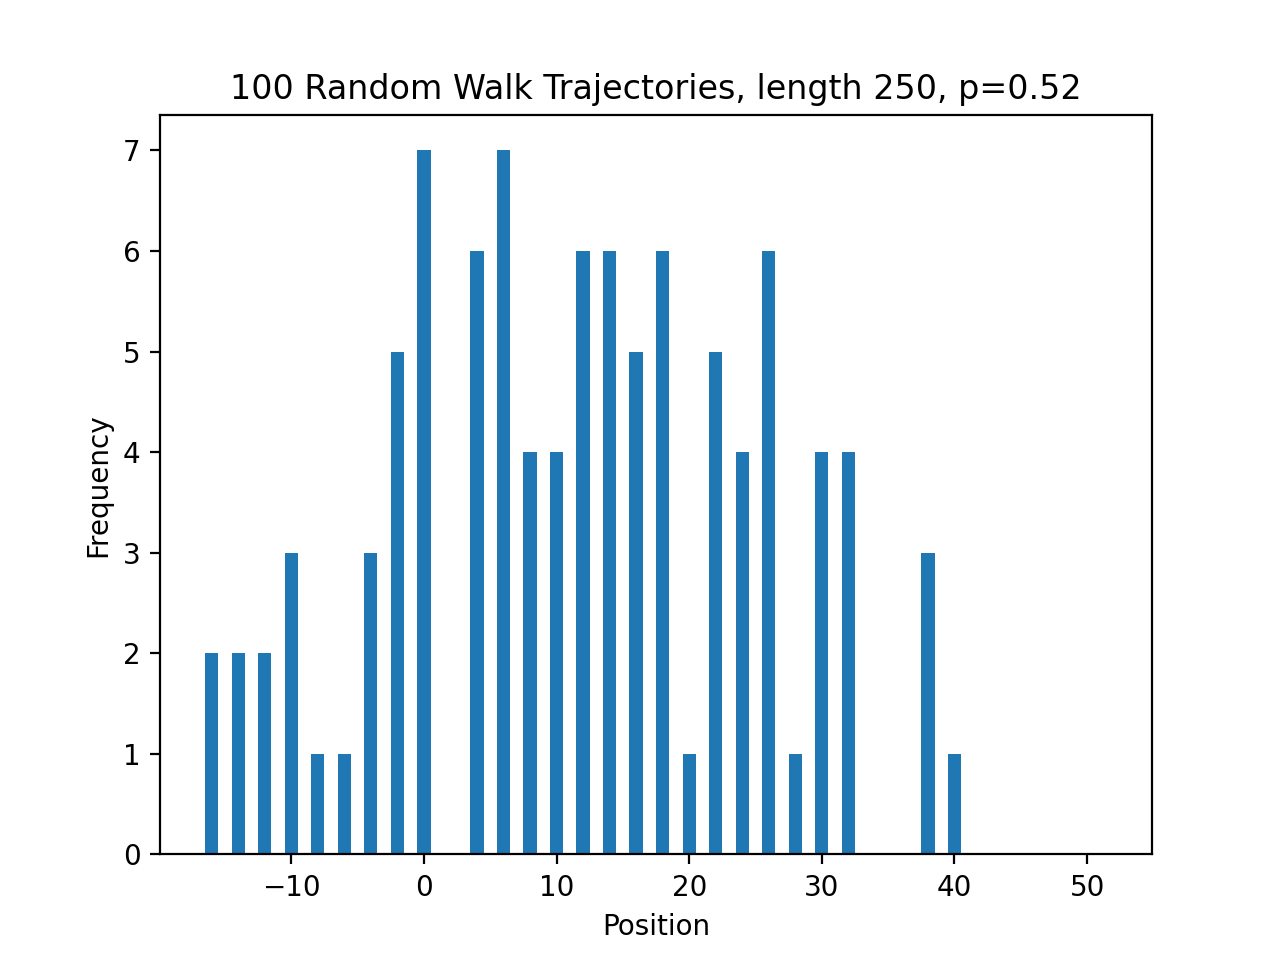

<IPython.core.display.Javascript object>


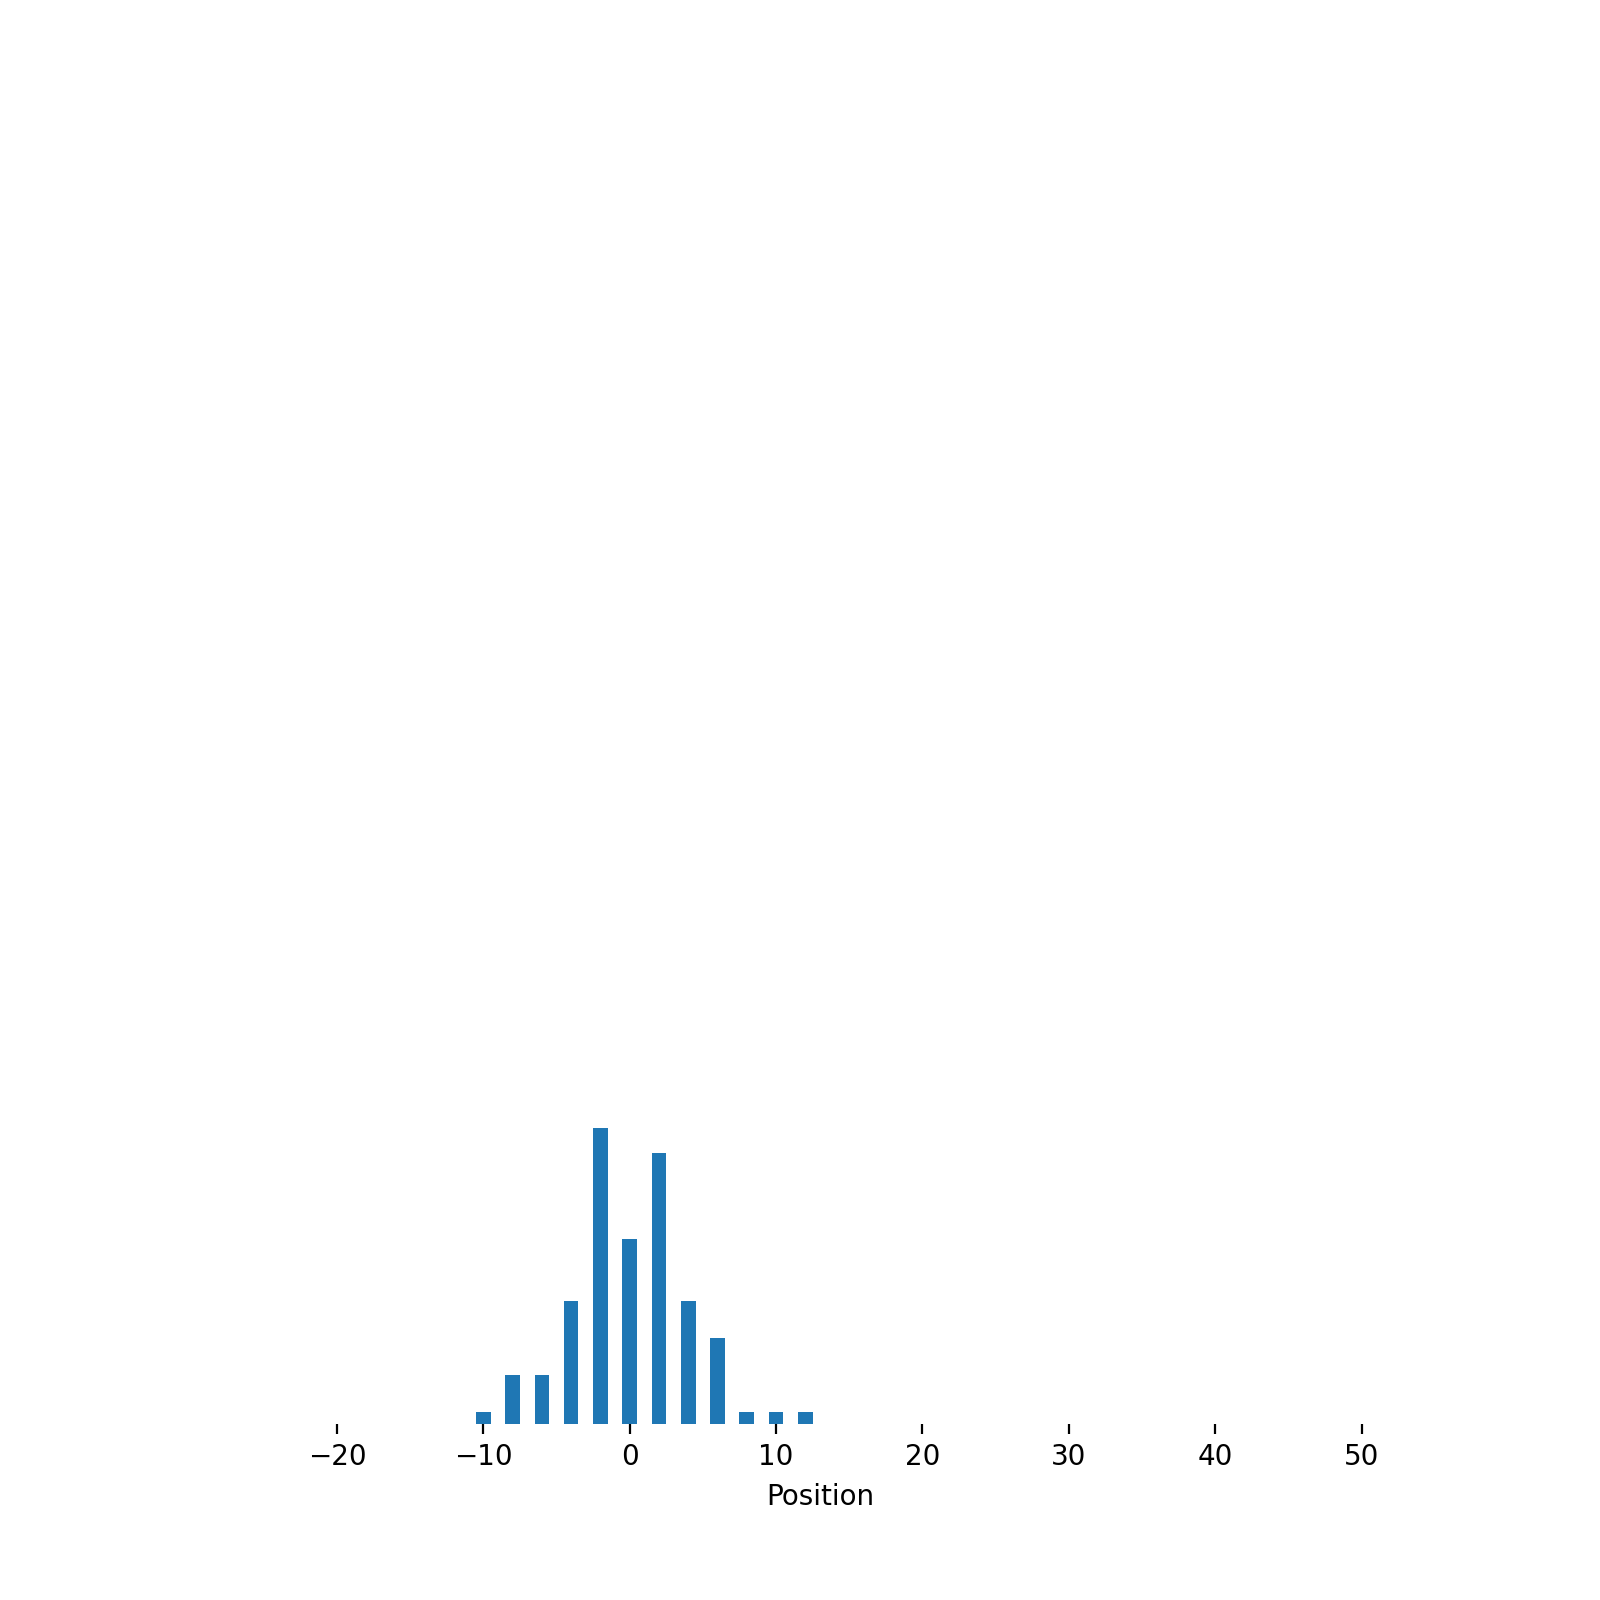

In [1]:
%matplotlib notebook

import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython import display


#make array of steps
all_steps = ((rng([250, 100])<.52).astype('int')-0.5)*2

#add up steps for final position
final_pos = all_steps.sum(axis=0)

bins = np.linspace( -100, 100)
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.title("100 Random Walk Trajectories, length 250, p=0.52" )
plt.hist(final_pos, bins=np.arange(np.min(final_pos)-0.5, np.max(final_pos)+0.5, 1))


#make new figure and set number of steps
fig = plt.figure(figsize=(8,8))  
num_steps = 250

#make array of steps
A = ((rng([250, 100])<.52).astype('int')-0.5)*2

#add up with cumsum steps for cumulative position
cum_pos = np.cumsum(all_steps, axis=0) 

#define function that takes frame number as argument. Every frame will be a row in cum_sum.
def get_step(n): 
    plt.clf()
    #plt.show()
    print(cum_pos[:n])
    
    #set bins to 0.75 the number of steps we are currently at
    plt.xlabel("Position")
    plt.ylabel("Frequency")
    plt.title("Time Development of 100 Random Walk Trajectories, length 250, p=0.52" )
    plt.ylim(0,100)
    plt.hist(cum_pos[n,:], bins= np.arange(np.min(cum_pos)-0.5, np.max(cum_pos)+0.5, 1))
    
    
# Call the animator and create the movie.
# my_movie = animation.FuncAnimation(fig, get_step, frames=num_steps)
# plt.show()

In the examples of Brownian motion with drift we discussed, there is a tendency for the distribution to move towards the direction with higher probability (in this case, to the right, because +1 has a slightly higher probability of 0.52). We can quantify this shift with expectation. 

The expected value of any given step is $<x> = (0.52*1 +0.48*-1)=0.04$, which is just above 0, supporting what we discussed. This expected value holds for every step, so the expectation of our walk destination is $250\cdot 0.04=10$. The distribution of these trajectories is the same distribution as when steps +1 and -1 have equal probabilities, just shifted to the right (centered at 10 instead of 0).

We note by the end, the distribution of final positions will appear Gaussian because we are summing up many random variables, each with the same distribution. We discuss this more in a later question (noting the distribution does not start off very skewed, because 0.52 is so close 0.50). 

## c.

We repeat our animation, but now with a probability of 0.2 for a +1 step. 

<IPython.core.display.Javascript object>


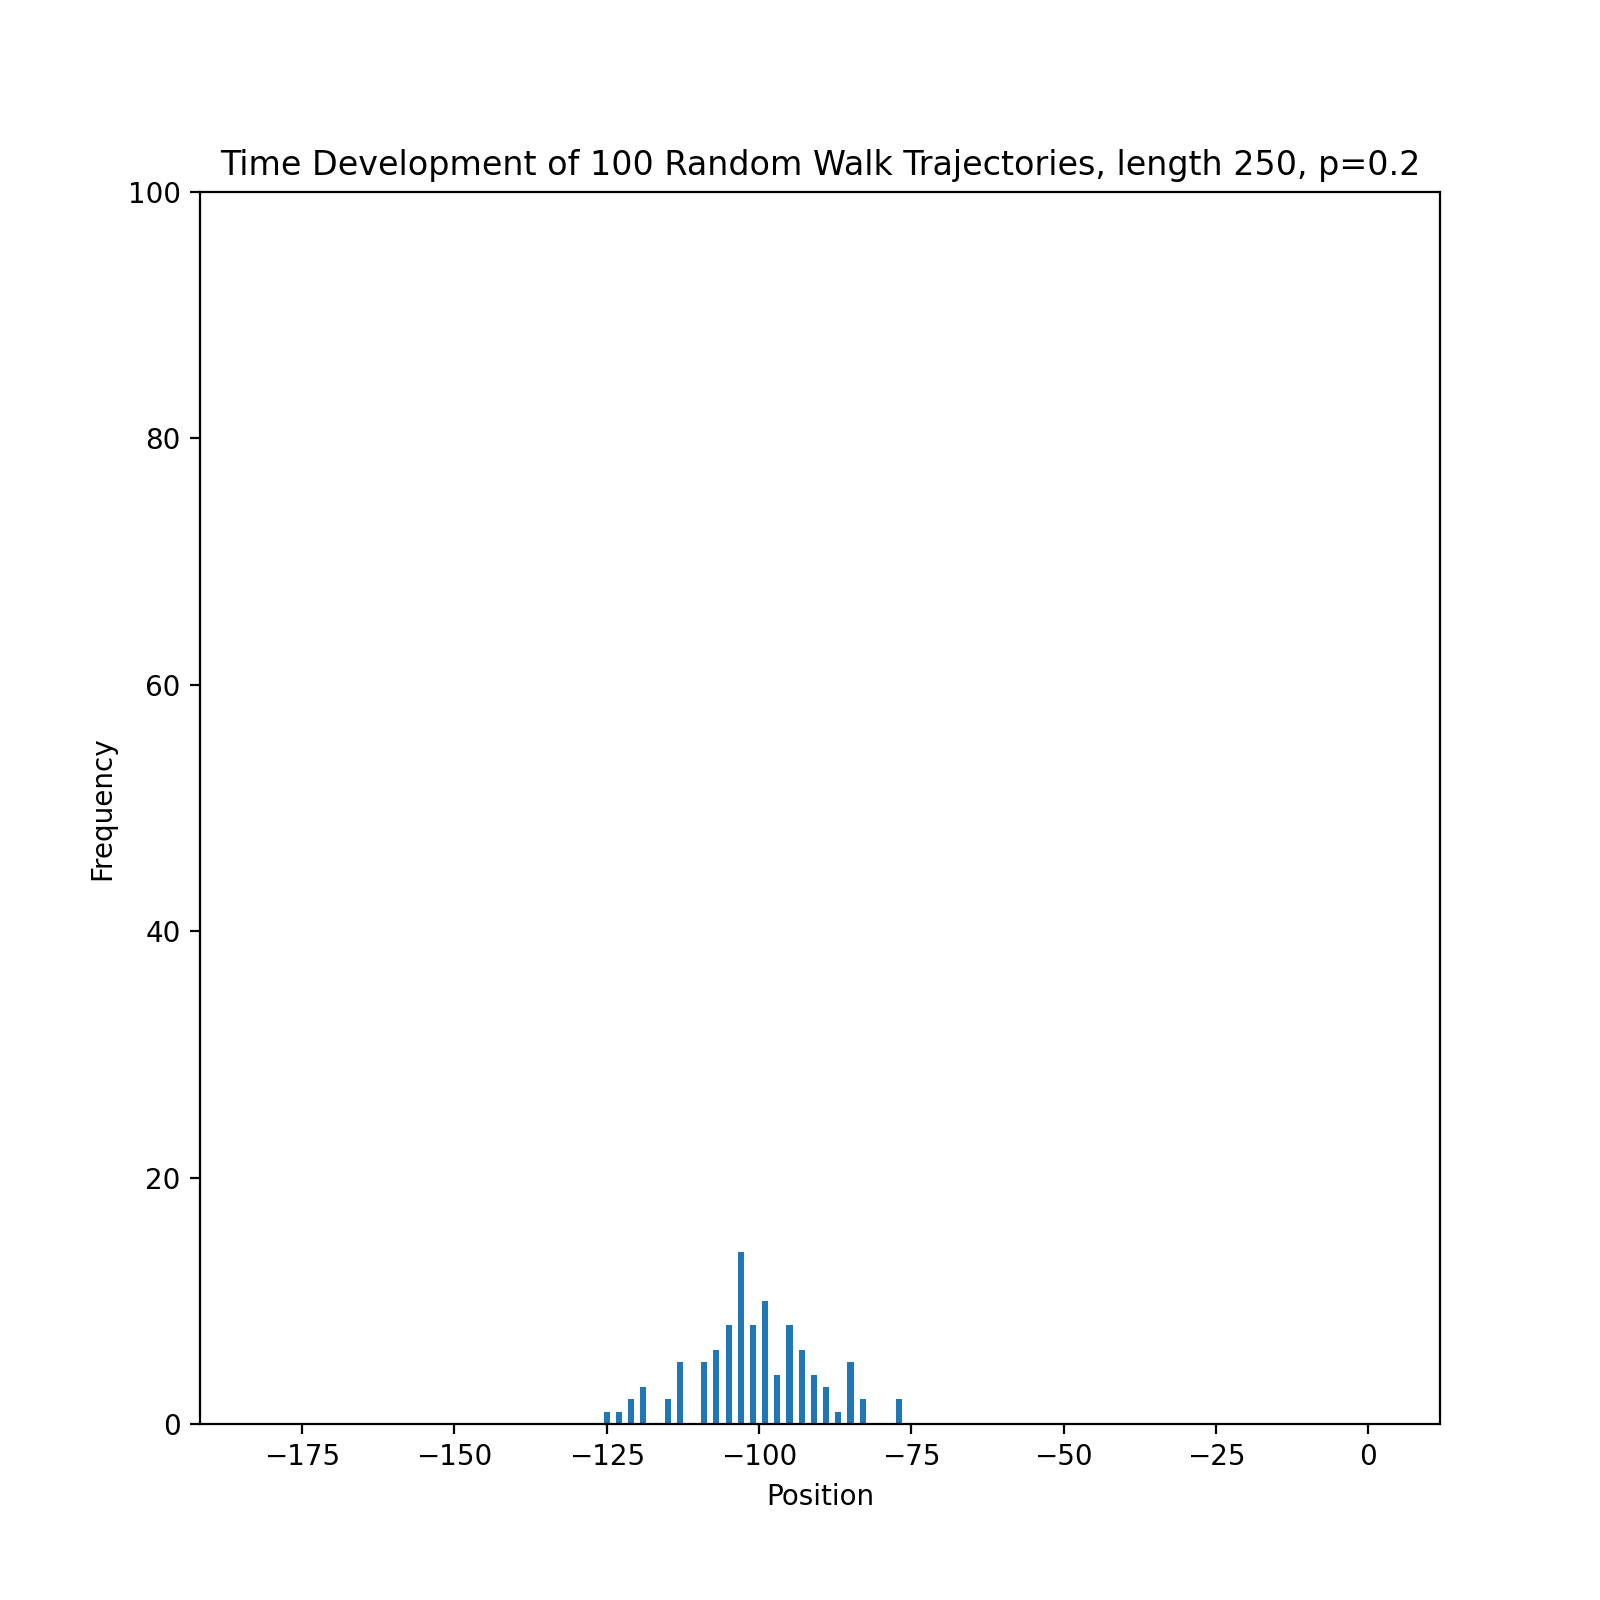

In [20]:
%matplotlib notebook

import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython import display

# Set number of steps for each random walk.
num_steps = 250


fig2 = plt.figure(figsize=(8,8)) # Must have figure object for movie. 


#make array of steps
all_steps = ((rng([250, 100])<.2).astype('int')-0.5)*2

#add up with cumsum steps for cumulative position
cum_pos = np.cumsum(all_steps, axis=0) 

#define function that takes frame number as argument. Every frame will be a row in cum_sum.
def get_step2(n): 
    plt.clf()
    plt.xlabel("Position")
    plt.ylabel("Frequency")
    plt.title("Time Development of 100 Random Walk Trajectories, length 250, p=0.2" )
    plt.ylim(0,100)
    plt.hist(cum_pos[n,:], bins= np.arange(np.min(cum_pos)-0.5, np.max(cum_pos)+0.5, 1))

# Call the animator and create the movie.
plt.show()
my_movie = animation.FuncAnimation(fig2, get_step2, frames=num_steps)

We change the probability of +1 to 0.2. We come to the same conclusion we reached in part b. Mainly, that the distribution is the same as when the probabilities of +1 and -1 , just shifted to the left because now $-1$ is more likely at any given step.

As above, the expected value of any given step is $<x> = (0.2*1 +0.8*-1)=-0.6$, which is  less than 0, meaning any given step is more likely to be to the left. This expected value holds for every step, so the expectation of our walk destination is $250\cdot 0.6=-150$. The distribution of these trajectories is the same distribution when steps +1 and -1 have equal probabilities, just shifted to the left (it is now centered at -150). 

We can adjust the probability of a +1 accordingly to center our distribution where we please. A probability of +1 greater than 0.5 leads to a right shift, and a probability of +1 less than 0.5 leads to a left shift.

We also note for very small or large p-values, the distribution will begin very skewed. With time, it becomes more and more Gaussian due to the Central Limit Theorem, as we are summing up more random variables from the same distribution. We see this in our animation. The histogram appears more Gaussian with time, and begins with a very skewed appearance. 


## d. 

We graph the trajectories with the new probabilities. 

<IPython.core.display.Javascript object>


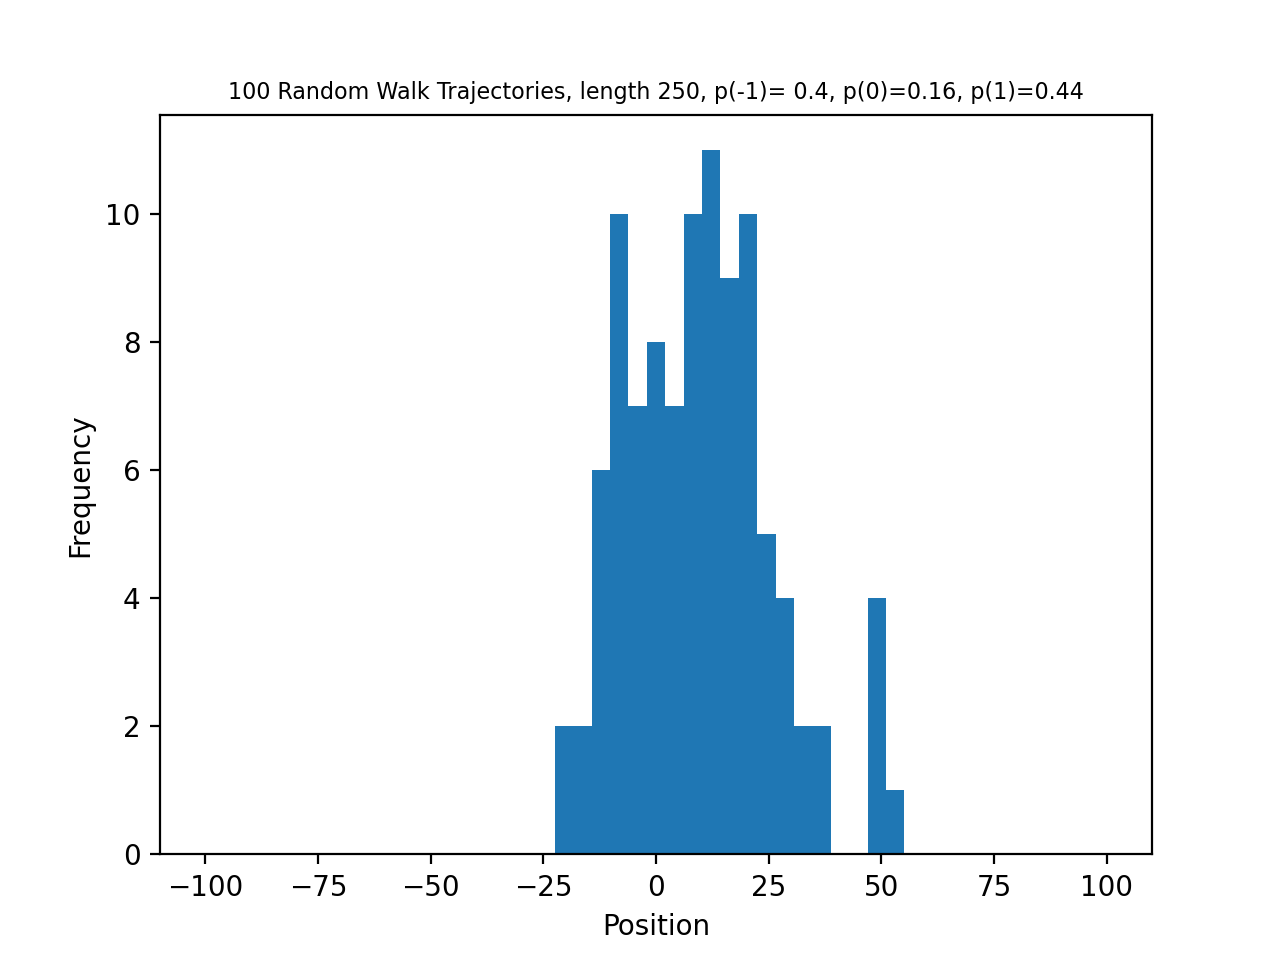

<IPython.core.display.Javascript object>


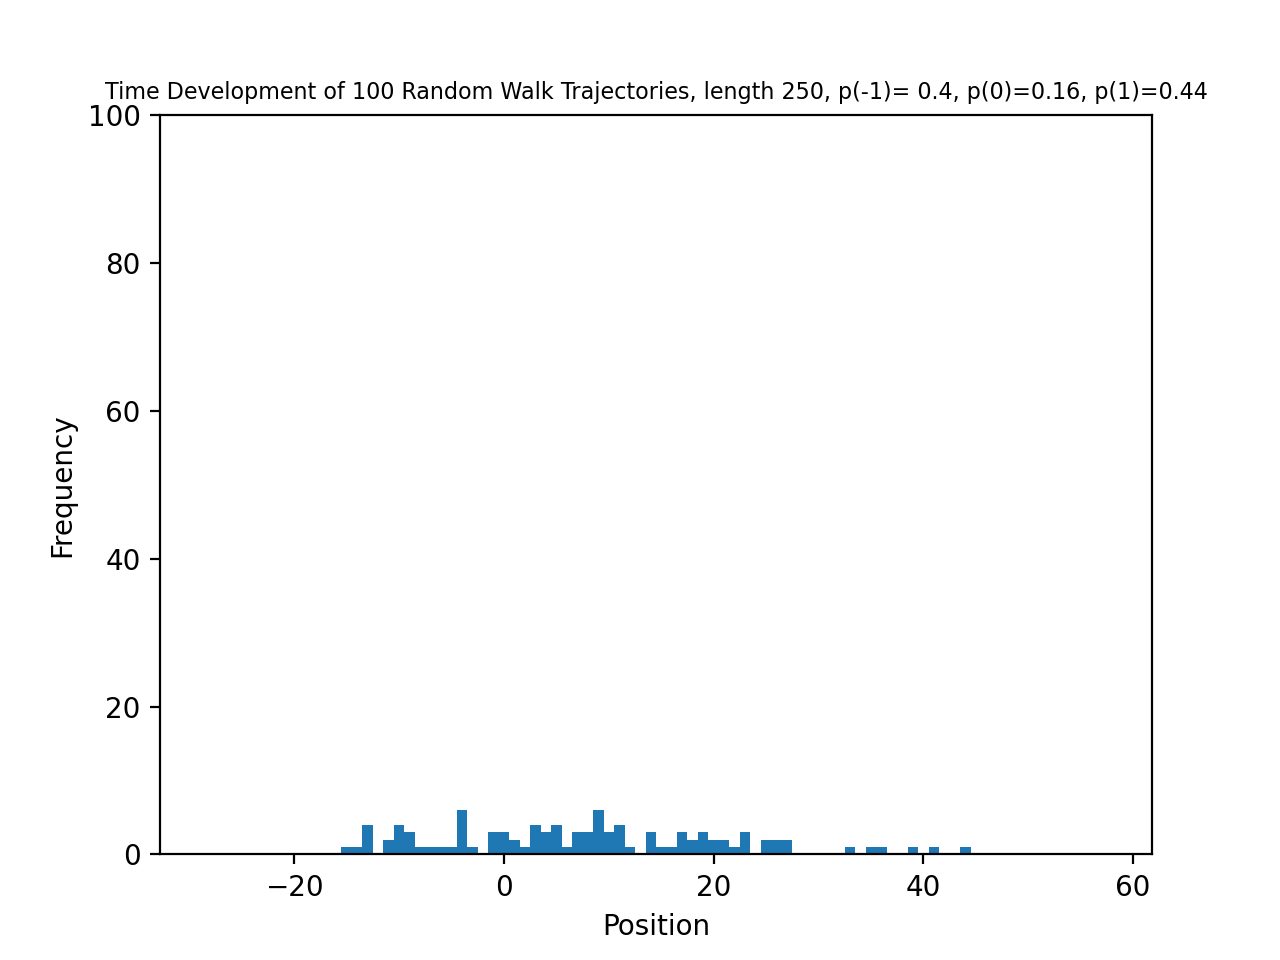

In [8]:
%matplotlib notebook

import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython import display


# Define parameters for the walk
num_steps = 250

#start all ways from the origin
origin = np.zeros((1,1))


#calculate array of steps
all_steps = np.random.choice(a=[-1, 0, 1], size=(250,100), p=[0.4, 0.16, 0.44])

#add up steps for final position
final_pos = np.sum(all_steps, axis=0)

#add up with cumsum steps for cumulative position
cum_pos = np.cumsum(all_steps, axis=0) 


#set bins and plot
bins = np.linspace( -100, 100)
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.rcParams["axes.titlesize"] = 8
plt.title("100 Random Walk Trajectories, length 250, p(-1)= 0.4, p(0)=0.16, p(1)=0.44" )
plt.hist(final_pos, bins= np.linspace( -100,100))


fig3 = plt.figure() # Must have figure object for movie. 
ax3 = plt.axes(xlim=(-50, 50), ylim=(0, 30))

def get_step3(n): 
    plt.clf()
    plt.show()
    plt.ylim(0,100)
    plt.xlabel("Position")
    plt.ylabel("Frequency")
    plt.rcParams["axes.titlesize"] = 8
    plt.title("Time Development of 100 Random Walk Trajectories, length 250, p(-1)= 0.4, p(0)=0.16, p(1)=0.44" )
    plt.hist(cum_pos[n,:],bins= np.arange(np.min(cum_pos)-0.5, np.max(cum_pos)+0.5, 1))

# Call the animator and create the movie.
my_movie = animation.FuncAnimation(fig3, get_step3, frames=250)
plt.show()


The origin of the jittering is the fact that a particle cannot stay in one place (i.e. move 0), and any given particle is always shifting to the left or the right at any given step. Described differently, the parity of a particle's position always changes (i.e. an even position will always become an odd, and an odd position will always become an even). Moreso, the parity of all positions at any given time is either even or odd (all positions are always even or odd because they all start at 0). 

In our bins, since particles always to move the left or the right, particles are switching bins often. This appears as jittering in the histogram. 


In this graph, we have allowed a nonzero probability for the particle to stay in one place, meaning it does not always shift to the left or right and the parity of a position does not have to change in any given step (we no longer have that all positions are always odd or even). This way, particles do not always have to shift and will not shift bins as often, so jittering is reduced. 